<a href="https://colab.research.google.com/github/shanikairoshi/QML-and-Deep-Unfolded_QML/blob/main/VQC_on_Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qiskit-machine-learning
!pip install qiskit qiskit_machine_learning qiskit_algorithms
!pip install qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.8/97.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.6/308.6 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 3.5 MB/s eta 0:00:00
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=512543 sha256=fe07a99893c3b63f81ae8fd70260df576ccbd6bfc397fc21ee68501aedea60e3
  Stored in directory: /root/.cache/pip/wheels/73/c8/f7/c25448dab74c3acf4848bc25d51

0.8912
0.8879
0.8997
0.8914
0.8855
0.8908
0.8960
0.8970
0.8983
0.8920
0.9013
0.8914
0.8986
0.8937
0.8922
0.8887
0.8943
0.8870
0.8868
0.8961
0.8995
0.8924
0.8970
0.8902
0.8931
0.8930
0.8957
0.9004
0.8993
0.8953
0.8858
0.8982
0.8964
0.8876
0.8962
0.8980
0.8981
0.8981
0.8924
0.9009
0.8911
0.9012
0.8929
0.8967
0.8910
0.9007
0.8976
0.8934
0.8919
0.8889
0.8893
0.8982
0.8919
0.8926
0.8948
0.8912
0.8901
0.8953
0.8943
0.8934
0.9002
0.8878
0.8975
0.8993
0.8883
0.8933
0.8886
0.8908
0.8959
0.8955
0.9037
0.8925
0.8841
0.8881
0.9013
0.8961
0.8974
0.8877
0.8973
0.8983
0.8937
0.8915
0.8892
0.8910
0.9044
0.8853
0.8938
0.8928
0.8844
0.8883
0.8856
0.8955
0.9010
0.8982
0.9039
0.8918
0.8975
0.8986
0.8941
0.9007
0.8993
0.8971
0.8951
0.8888
0.8938
0.9008
0.8924
0.8816
0.8932
0.8966
0.8898
0.8942
0.9037
0.8890
0.8974
0.8928
0.8981
0.8755
0.8952
0.8838
0.8948
0.8963
0.8985
0.8883
0.8903
0.8896
0.8910
0.8830
0.8893
0.8984
0.8830
Execution time: 1450.6669216156006 seconds

opt_params: [0.07413636 0.90092089 0.45

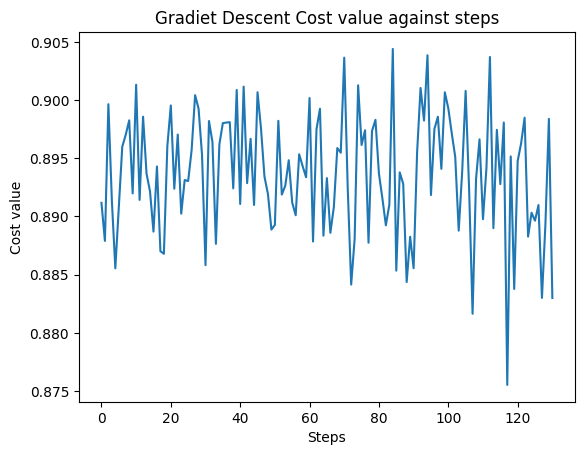

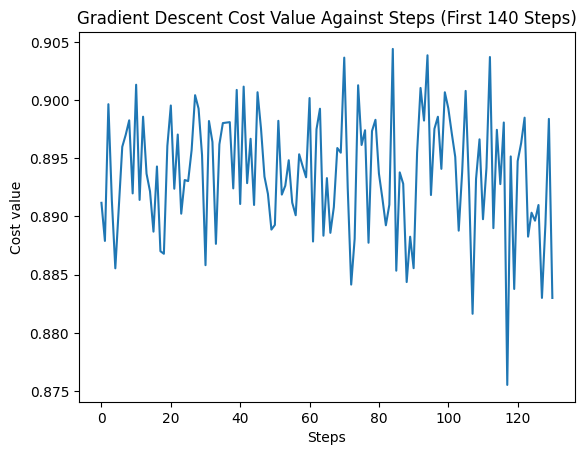

In [3]:
#from qiskit.ml.datasets import *
from qiskit import QuantumCircuit
from qiskit_algorithms.optimizers  import COBYLA, ADAM, SPSA, SLSQP, POWELL, L_BFGS_B, TNC, AQGD
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
from qiskit.quantum_info import Statevector
from qiskit_aer import Aer
from qiskit import transpile
#from qiskit.utils import QuantumInstance
from qiskit_machine_learning.algorithms import VQC

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline


# constants
n = 4
RANDOM_STATE = 42
LR = 1e-3
class_labels = ['yes', 'no']

def normalizeData(DATA_PATH = "/content/drive/MyDrive/Colab Notebooks/QML/Data/Processed/winedata.csv"):

    """
    Normalizes the data
    """
    # Reads the data
    data = pd.read_csv(DATA_PATH)
    data = shuffle(data, random_state=RANDOM_STATE)
    X, Y = data[['alcohol', 'flavanoids', 'color_intensity', 'proline']].values, data['target'].values
    # normalize the data
    scaler = MinMaxScaler(feature_range=(-2 * np.pi, 2 * np.pi))
    X = scaler.fit_transform(X)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=RANDOM_STATE)
    return X_train, X_test, Y_train, Y_test

X_train, X_test, Y_train, Y_test = normalizeData()

from qiskit.circuit.library import ZZFeatureMap, TwoLocal
FEATURE_MAP = ZZFeatureMap(feature_dimension=2, reps=2)
VAR_FORM = TwoLocal(2, ['ry', 'rz'], 'cz', reps=2)
circuit = FEATURE_MAP.compose(VAR_FORM)
circuit.draw()

AD_HOC_CIRCUIT = FEATURE_MAP.compose(VAR_FORM)
AD_HOC_CIRCUIT.measure_all()
AD_HOC_CIRCUIT.decompose().draw()

def circuit_instance(data, variational):
    """Assigns parameter values to `AD_HOC_CIRCUIT`.
    Args:
        data (list): Data values for the feature map
        variational (list): Parameter values for `VAR_FORM`
    Returns:
        QuantumCircuit: `AD_HOC_CIRCUIT` with parameters assigned
    """
    # pylint: disable=invalid-name
    parameters = {}
    for i, p in enumerate(FEATURE_MAP.ordered_parameters):
        parameters[p] = data[i]
    for i, p in enumerate(VAR_FORM.ordered_parameters):
        parameters[p] = variational[i]
    return AD_HOC_CIRCUIT.assign_parameters(parameters)

def parity(bitstring):
    """Returns 1 if parity of `bitstring` is even, otherwise 0."""
    hamming_weight = sum(int(k) for k in list(bitstring))
    return (hamming_weight+1) % 2

def label_probability(results):
    """Converts a dict of bitstrings and their counts,
    to parities and their counts"""
    shots = sum(results.values())
    probabilities = {0: 0, 1: 0}
    for bitstring, counts in results.items():
        label = parity(bitstring)
        probabilities[label] += counts / shots
    return probabilities

def classification_probability(data, variational):
    """Classify data points using given parameters.
    Args:
        data (list): Set of data points to classify
        variational (list): Parameters for `VAR_FORM`
    Returns:
        list[dict]: Probability of circuit classifying
                    each data point as 0 or 1.
    """
    circuits = [circuit_instance(d, variational) for d in data]
    backend = Aer.get_backend('qasm_simulator')
    # Transpile and execute each circuit individually
    results = []
    for circuit in circuits:
        t_circuit = transpile(circuit, backend)
        result = backend.run(t_circuit).result() # Execute each transpiled circuit
        results.append(result)
    classification = [
        label_probability(result.get_counts()) for result in results] # Get counts from each result
    return classification

def cross_entropy_loss(classification, expected):
    """Calculate accuracy of predictions using cross entropy loss.
    Args:
        classification (dict): Dict where keys are possible classes,
                               and values are the probability our
                               circuit chooses that class.
        expected (int): Correct classification of the data point.

    Returns:
        float: Cross entropy loss
    """
    # pylint: disable=invalid-name
    p = classification.get(expected)  # Prob. of correct classification
    return -np.log(p + 1e-10)

cost_list = []
def cost_function(data, labels, variational,print_value=True):
    """Evaluates performance of our circuit with `variational`
    parameters on `data`.

    Args:
        data (list): List of data points to classify
        labels (list): List of correct labels for each data point
        variational (list): Parameters to use in circuit

    Returns:
        float: Cost (metric of performance)
    """
    # pylint: disable=invalid-name
    classifications = classification_probability(data, variational)
    cost = 0
    for i, classification in enumerate(classifications):
        cost += cross_entropy_loss(classification, labels[i])
    cost /= len(data)
    # Log the cost and parameters
    log.update(len(cost_list), variational, cost, None, None)

    # print resulting objective function
    if print_value:
        print('%.4f' % cost)
    # return objective value
    cost_list.append(cost)
    return cost

import csv
class OptimizerLog:  # pylint: disable=too-few-public-methods
    """Log to store optimizer's intermediate results"""
    def __init__(self):
        self.evaluations = []
        self.parameters = []
        self.costs = []
    def update(self, evaluation, parameter, cost, stepsize, accept):
        """Save intermediate results. Optimizer passes five values
        but we ignore the last two."""
        self.evaluations.append(evaluation)
        self.parameters.append(parameter)
        self.costs.append(cost)
    def save_to_csv(self, filename='optimizer_log_GradientDescent100.csv'):
        """Save evaluations and costs to a CSV file."""
        with open(filename, mode='w', newline='') as file:
            writer = csv.writer(file)
            writer.writerow(['Evaluation', 'Cost'])
            for evaluation, cost in zip(self.evaluations, self.costs):
                writer.writerow([evaluation, cost])
        print(f"Optimizer log saved to {filename}")

# Set up the optimization
from qiskit_algorithms.optimizers import GradientDescent
#from qiskit.algorithms.optimizers import SPSA
log = OptimizerLog()
cost_list = []
#optimizer = SPSA(maxiter=50)
optimizer = GradientDescent(maxiter=10)

initial_point = np.random.random(VAR_FORM.num_parameters)
#initial_point = np.array([3.28559355, 5.48514978, 5.13099949,
                          #0.88372228, 4.08885928, 2.45568528,
                          #4.92364593, 5.59032015, 3.66837805,
                          #4.84632313, 3.60713748, 2.43546])
import time
def objective_function(variational):
    """Cost function of circuit parameters on training data.
    The optimizer will attempt to minimize this."""
    return cost_function(X_train, Y_train, variational)

start_time = time.time()
# Run the optimization
result = optimizer.minimize(objective_function, initial_point)

end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

opt_var = result.x
opt_value = result.fun
print()
print('opt_params:', opt_var)
print('opt_value: ', opt_value)

# Save optimization log to CSV
log.save_to_csv('optimizer_log_GradientDescent_100.csv')

fig = plt.figure()
plt.plot(range(0,len(cost_list),1), cost_list)
plt.xlabel('Steps')
plt.ylabel('Cost value')
plt.title("Gradiet Descent Cost value against steps")
plt.show()

fig = plt.figure()
plt.plot(range(0, min(len(cost_list), 140), 1), cost_list[:140])
plt.xlabel('Steps')
plt.ylabel('Cost value')
plt.title("Gradient Descent Cost Value Against Steps (First 140 Steps)")
plt.show()

In [4]:


print(f'Precomputed Kernal clasiffication test score: {zzpc_score}')

NameError: name 'zzpc_score' is not defined

In [5]:
# Save optimization log to CSV
log.save_to_csv('optimizer_log_GradientDescent_100.csv')

Optimizer log saved to optimizer_log_GradientDescent_100.csv


In [ ]:
def mse_cost(classification, expected_label):
    p = classification.get(expected_label)
    actual, pred = np.array(1), np.array(p)
    return np.square(np.subtract(actual,pred)).mean()